In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [97]:
%pip install seaborn

In [98]:
import seaborn as sns

In [99]:
# List of possible encodings to try
encodings = ['utf-8', 'Latin-1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'  # Change this to the path of your CSV file

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break  # Stop the Loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue  # Try the next encoding

if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
File successfully read with encoding: Latin-1
CSV file has been successfully loaded.


In [100]:
df.shape

(5572, 5)

In [101]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4026,ham,"Yes, princess. Are you going to make me moan?",NaN,NaN,NaN
4586,ham,"I'll see if I can swing by in a bit, got some ...",NaN,NaN,NaN
1110,ham,Ok ill tell the company,NaN,NaN,NaN
5193,ham,"It's wylie, you in tampa or sarasota?",NaN,NaN,NaN
4112,ham,Thought we could go out for dinner. I'll treat...,NaN,NaN,NaN


In [102]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

**1**. **Data** **Cleaning**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [104]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [105]:
df.sample(5)

,v1,v2
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."
4160,spam,Had your mobile 11 months or more? U R entitle...
3191,ham,Is ur paper today in e morn or aft?
1137,ham,LOL ... No just was busy
2425,ham,Hey!!! I almost forgot ... Happy B-day babe ! ...


In [106]:
 # renaming the cols
df.rename(columns={'v1' :'target' , 'v2' : 'text'},inplace=True)
df.sample(5)

,target,text
726,ham,Of cos can lar i'm not so ba dao ok... 1 pm lo...
386,ham,Customer place i will call you.
2848,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
616,ham,He like not v shock leh. Cos telling shuhui is...
1600,ham,K.then any other special?


In [107]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target'] = encoder.fit_transform(df['target'] )
df. head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [108]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [109]:
df.duplicated().sum()

403

In [110]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [111]:
df.shape

(5169, 2)

**2. Data Exploration**

In [112]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

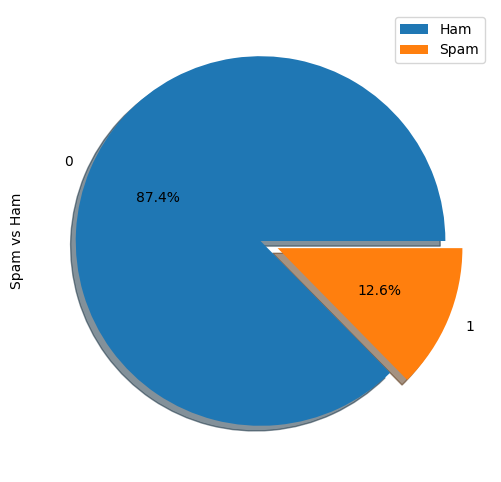

In [113]:
df["target"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()


In [114]:
topMessages = df.groupby("text")["target"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
&lt;#&gt; in mca. But not conform.,1,0
See you there!,1,0
"SPJanuary Male Sale! Hot Gay chat now cheaper, call 08709222922. National rate from 1.5p/min cheap to 7.8p/min peak! To stop texts call 08712460324 (10p/min)",1,1
SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBED AT 430 GOT UP 4 WORK AT 630,1,0
SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW R U MAN? ALL IS GOOD IN WALES ILL B BACK åÔMORROW. C U THIS WK? WHO WAS THE MSG 4? åÐ RANDOM!,1,0
"SMSSERVICES. for yourinclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge. help 08702840625.COMUK. 220-CM2 9AE",1,1
SMS. ac sun0819 posts HELLO:\You seem cool,1,1
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV,1,1
"SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO",1,1


In [115]:
#Big Chunk of ham and very less spam so out data is not balanced

In [116]:
import nltk

In [117]:
%pip install nltk

In [118]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [120]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count
df. head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [121]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [122]:
df[['num_characters', 'num_words','num_sentences']]. describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [123]:
# targeting ham
df[df['target']==0][['num_characters','num_words', 'num_sentences']] .describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [124]:
#targeting spam
df[df['target']==1][['num_characters','num_words', 'num_sentences']] .describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

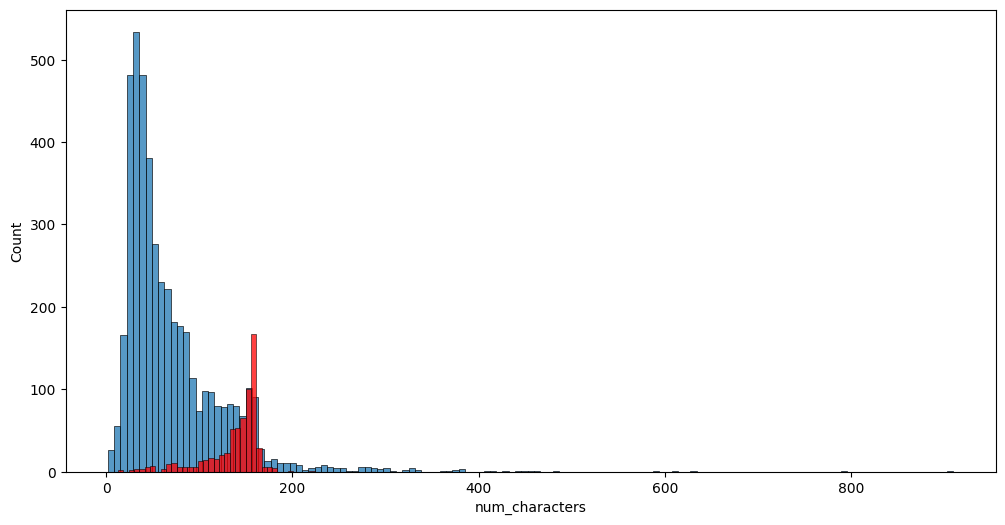

In [125]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

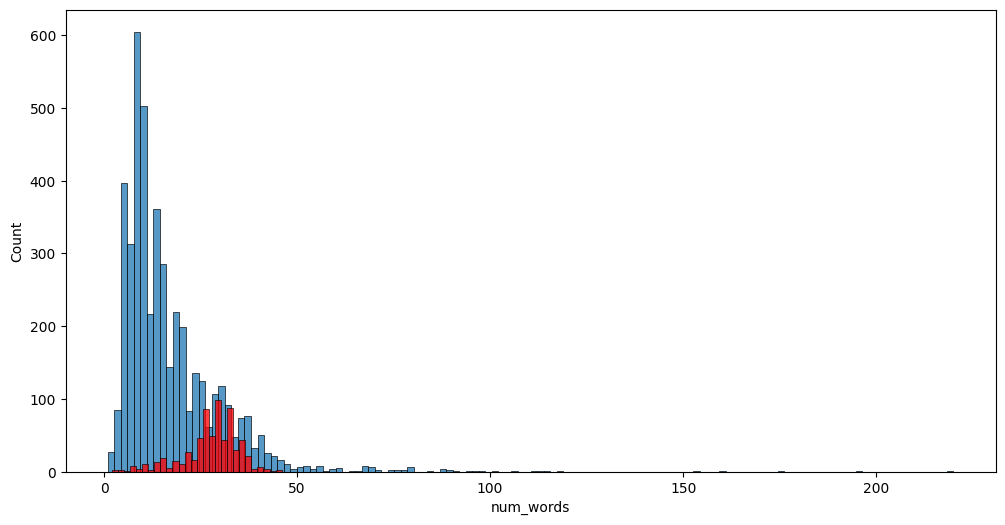

In [126]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

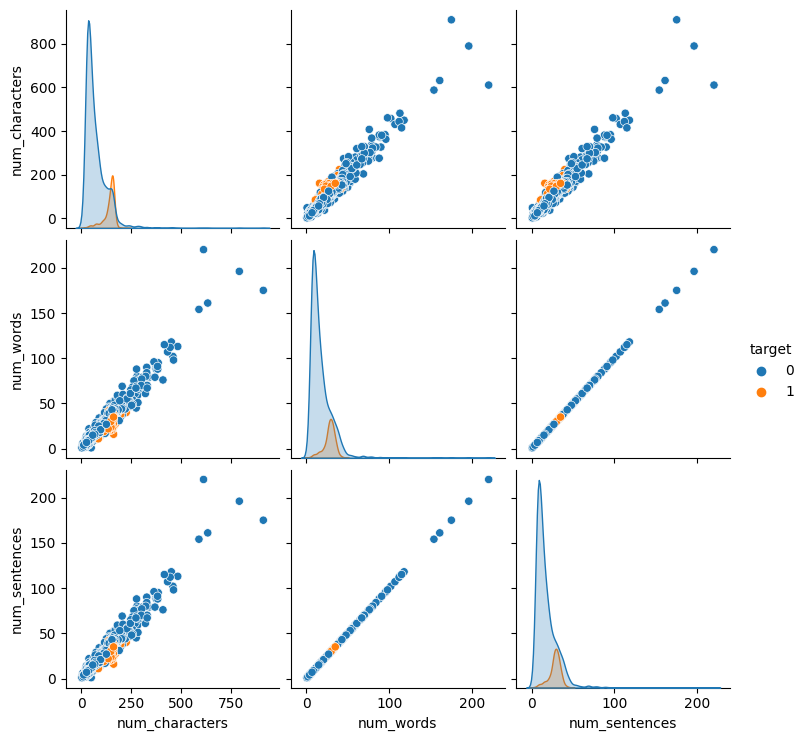

In [127]:
sns.pairplot(df,hue='target')

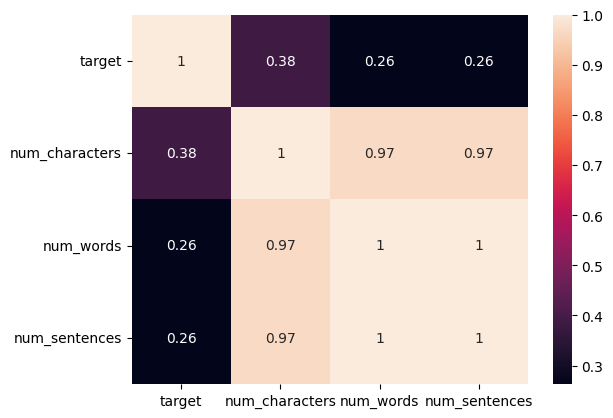

In [128]:
# Assuming 'text_column' is a non-numeric column that you want to exclude
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns only
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## **3. Data Preprocessing**
-Lower case
-Tokenization
-Removing special characters
-Removing stop words and punctuation
-Stemming

In [129]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download( 'stopwords' ) # You may need to download the stopwords datas
ps = PorterStemmer()
def transform_text(text):
    text = text. lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append (ps. stem(i))
    return" ".join(y)
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? i've cried enough today.")
print (transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [131]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem( ' lovingg ' )

' lovingg '

In [132]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


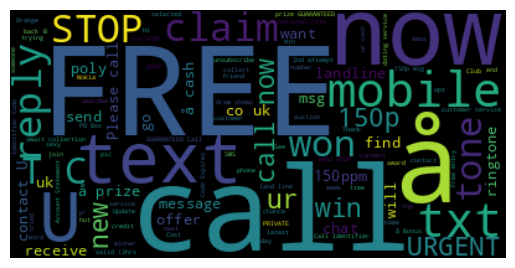

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'target' is the column with class labels and 'transformed_text' is the text column
spam_wc = WordCloud().generate(df[df['target'] == 1]['text'].str.cat(sep=" "))

# Display the WordCloud
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()


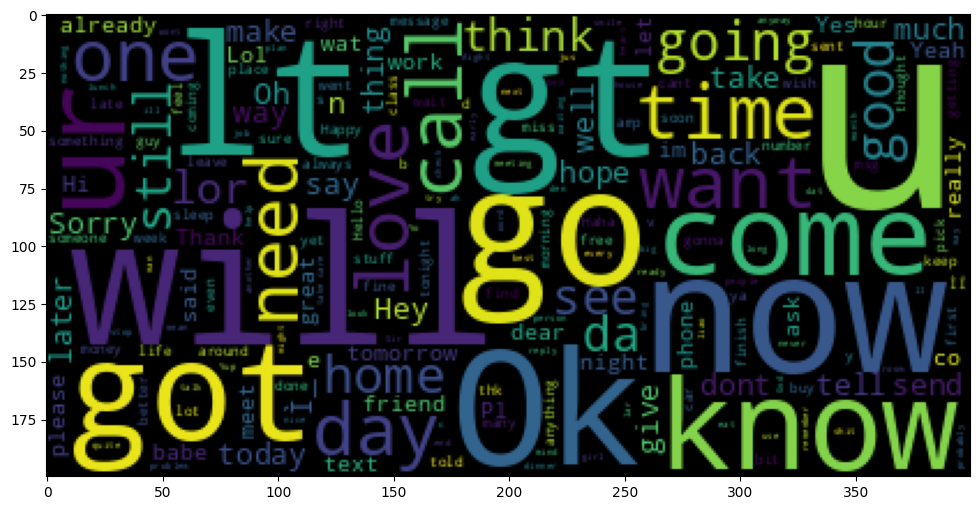

In [134]:
ham_wc = WordCloud().generate(df[df['target'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [135]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [136]:
spam_corpus = []
for msg in df[df['target'] == 1] ['text'].tolist():
    for word in msg.split():
        spam_corpus.append (word)

In [137]:
len(spam_corpus)

15464

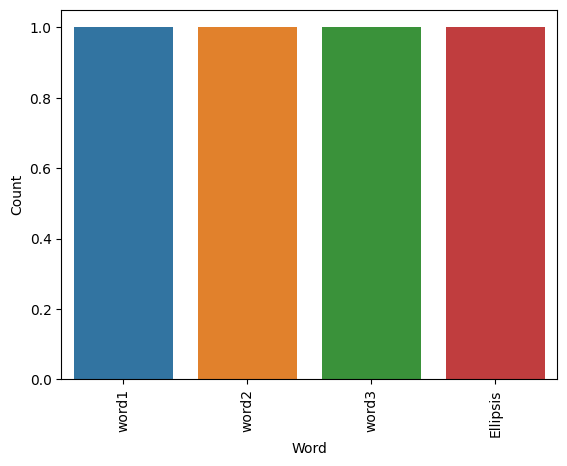

In [138]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

spam_corpus = ["word1", "word2", "word3", ...]  # Replace with your actual data

# Create a Counter for the spam_corpus
word_counts = Counter(spam_corpus)

# Create a DataFrame with named columns
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Use seaborn's barplot
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


**4.Building The Model**

In [139]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [140]:
X = tfidf.fit_transform(df[ 'transformed_text' ] ) .toarray()

In [141]:
X.shape

(5169, 3000)

In [142]:
y=df['target'].values

In [143]:
from sklearn.model_selection import train_test_split


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [146]:
gnb  = GaussianNB()
mnb  = MultinomialNB()
bnb  = BernoulliNB()


In [147]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score (y_test , y_pred1) )
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1) )

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [148]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [149]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score (y_test, y_pred3) )
print(confusion_matrix(y_test,y_pred3))
print (precision_score (y_test, y_pred3) )

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [150]:
%pip install xgboost

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [152]:
svc = SVC(kernel= 'sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='lib1inear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [153]:
clfs={
    'SVC' : SVC,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' :lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [154]:
def train_classifier(clf,X_train,y_train,X_test,y_test) :
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [155]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [156]:
accuracy_scores=[]
precision_scores=[]
clf = SVC()
for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(svc,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accurancy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  DT
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  LR
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  RF
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  AdaBoost
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  BgC
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  ETC
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865
For  xgb
Accurancy -  0.9758220502901354
Precision -  0.9747899159663865


In [157]:
import pandas as pd

# Assuming accuracy_scores and precision_scores are lists with numerical values
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

# Print or inspect the resulting DataFrame
print(performance_df)



   Algorithm  Accuracy  Precision
0        SVC  0.975822    0.97479
1         KN  0.975822    0.97479
2         NB  0.975822    0.97479
3         DT  0.975822    0.97479
4         LR  0.975822    0.97479
5         RF  0.975822    0.97479
6   AdaBoost  0.975822    0.97479
7        BgC  0.975822    0.97479
8        ETC  0.975822    0.97479
9       GBDT  0.975822    0.97479
10       xgb  0.975822    0.97479


In [158]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [159]:
performance_df1


,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.975822
2,NB,Accuracy,0.975822
3,DT,Accuracy,0.975822
4,LR,Accuracy,0.975822
5,RF,Accuracy,0.975822
6,AdaBoost,Accuracy,0.975822
7,BgC,Accuracy,0.975822
8,ETC,Accuracy,0.975822
9,GBDT,Accuracy,0.975822


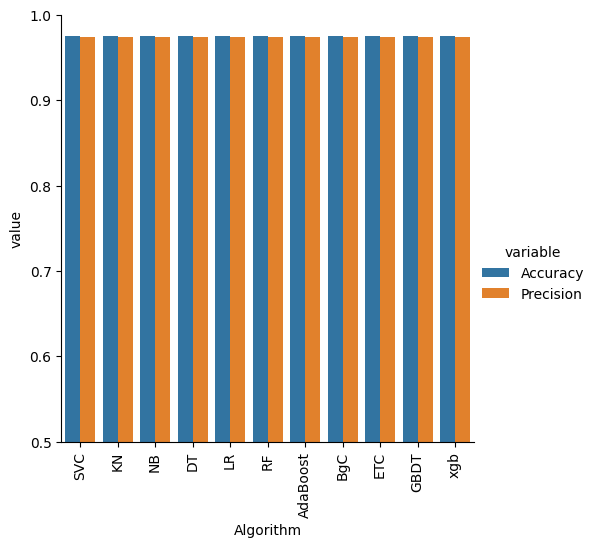

In [160]:
sns.catplot(x ='Algorithm', y='value',
                 hue = 'variable' , data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [161]:
temp_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values(by='Precision_max_ft_3000', ascending=False)


In [162]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [163]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [164]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [165]:
temp_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores})
temp_df = temp_df.sort_values(by='Precision_num_chars', ascending=False)



In [166]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
1,KN,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
2,NB,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
3,DT,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
4,LR,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
5,RF,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
6,AdaBoost,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
7,BgC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
8,ETC,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479
9,GBDT,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479,0.975822,0.97479


In [167]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [168]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb), ('et',etc)],voting='soft')

In [169]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [170]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print( "Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [171]:
estimators=[('svm', svc), ('nb',mnb), ('et',etc)]
final_estimator=RandomForestClassifier()

In [172]:
from sklearn.ensemble import StackingClassifier

In [173]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [174]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb') )
pickle.dump(mnb,open('model.pkl','wb') )

In [176]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample text data and corresponding labels (replace with your actual data)
x_train_tfidf = ["sample text 1", "sample text 2", "sample text 3"]
y_train = [0, 1, 0]  # Example labels (0 for negative, 1 for positive)

# create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(x_train_tfidf)

# create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
